In [1]:
import tensorflow as tf
tf.__version__

'2.7.0'

In [2]:
tf.test.gpu_device_name()

'/device:GPU:0'

In [3]:
from tensorflow.keras.datasets import imdb

In [4]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=10000)

In [5]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((25000,), (25000,), (25000,), (25000,))

In [6]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

#### The text data is already in vector form. So we dont need to do any embedding

In [7]:
y_train[:2]

array([1, 0])

The y data is in already label encoded.
1--> Bad Review
0--> Good Review

In [8]:
import numpy as np

In [9]:
def vector_seq(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
#X_train = vector_seq(X_train)
#X_test = vector_seq(X_test)

In [11]:
X_train[:2]

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1153, 194, 8255, 78, 228,

In [12]:
#As the dataset has different lengths, we will do padding

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
X_train_padded = pad_sequences(X_train, padding='post', maxlen=200)     # Not giving maxlen argument, It will automatically create padding taking the
                                                            # maxlen of largest array

In [14]:
X_train_padded[:2]

array([[   5,   25,  100,   43,  838,  112,   50,  670,    2,    9,   35,
         480,  284,    5,  150,    4,  172,  112,  167,    2,  336,  385,
          39,    4,  172, 4536, 1111,   17,  546,   38,   13,  447,    4,
         192,   50,   16,    6,  147, 2025,   19,   14,   22,    4, 1920,
        4613,  469,    4,   22,   71,   87,   12,   16,   43,  530,   38,
          76,   15,   13, 1247,    4,   22,   17,  515,   17,   12,   16,
         626,   18,    2,    5,   62,  386,   12,    8,  316,    8,  106,
           5,    4, 2223, 5244,   16,  480,   66, 3785,   33,    4,  130,
          12,   16,   38,  619,    5,   25,  124,   51,   36,  135,   48,
          25, 1415,   33,    6,   22,   12,  215,   28,   77,   52,    5,
          14,  407,   16,   82,    2,    8,    4,  107,  117, 5952,   15,
         256,    4,    2,    7, 3766,    5,  723,   36,   71,   43,  530,
         476,   26,  400,  317,   46,    7,    4,    2, 1029,   13,  104,
          88,    4,  381,   15,  297, 

In [15]:
len(X_train[1]), len(X_train_padded[0])

(189, 200)

In [16]:
X_test_padded = pad_sequences(X_test, maxlen=len(X_train_padded[0]))

In [17]:
len(X_test_padded[152])

200

## Building Model

In [18]:
from tensorflow.keras.layers import LSTM, Dense, Flatten, Embedding,Bidirectional
from tensorflow.keras.models import Sequential

In [19]:
vocab_size=10000
embed_size=128

In [20]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=128, input_shape=(len(X_train_padded[0]),) ) )
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(LSTM(64))
#model.add(Flatten())

model.add(Dense(1, activation='sigmoid'))

#model.summary()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 200, 128)         98816     
 l)                                                              
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1,428,289
Trainable params: 1,428,289
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [23]:
# Set a VALIDATION set

x_val = X_train_padded[:10000]
partial_x_train = X_train_padded[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [24]:
X_train_padded

array([[   5,   25,  100, ...,   19,  178,   32],
       [   1,  194, 1153, ...,    0,    0,    0],
       [   1,   14,   47, ...,    0,    0,    0],
       ...,
       [   1,   11,    6, ...,    0,    0,    0],
       [   1, 1446, 7079, ...,    0,    0,    0],
       [   1,   17,    6, ...,    0,    0,    0]], dtype=int32)

In [25]:
hist = model.fit(partial_x_train, partial_y_train, epochs=15, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/15
118/118 [==============================] - 30s 204ms/step - loss: 0.6067 - accuracy: 0.6293 - val_loss: 0.4121 - val_accuracy: 0.8212
Epoch 2/15
118/118 [==============================] - 20s 173ms/step - loss: 0.4736 - accuracy: 0.7603 - val_loss: 0.5447 - val_accuracy: 0.7054
Epoch 3/15
118/118 [==============================] - 16s 134ms/step - loss: 0.3182 - accuracy: 0.8821 - val_loss: 0.3645 - val_accuracy: 0.8541
Epoch 4/15
118/118 [==============================] - 15s 127ms/step - loss: 0.2774 - accuracy: 0.8947 - val_loss: 0.4424 - val_accuracy: 0.8399
Epoch 5/15
118/118 [==============================] - 15s 128ms/step - loss: 0.2327 - accuracy: 0.9252 - val_loss: 0.4395 - val_accuracy: 0.8466
Epoch 6/15
118/118 [==============================] - 15s 128ms/step - loss: 0.3021 - accuracy: 0.9006 - val_loss: 0.4652 - val_accuracy: 0.8193
Epoch 7/15
118/118 [==============================] - 15s 127ms/step - loss: 0.2588 - accuracy: 0.9009 - val_loss: 0.4776 - val_ac

In [26]:
X_test_padded.shape

(25000, 200)

In [27]:
model.evaluate(X_test_padded, y_test)

782/782 [==============================] - 31s 40ms/step - loss: 0.6323 - accuracy: 0.8406


[0.6323317885398865, 0.8406000137329102]

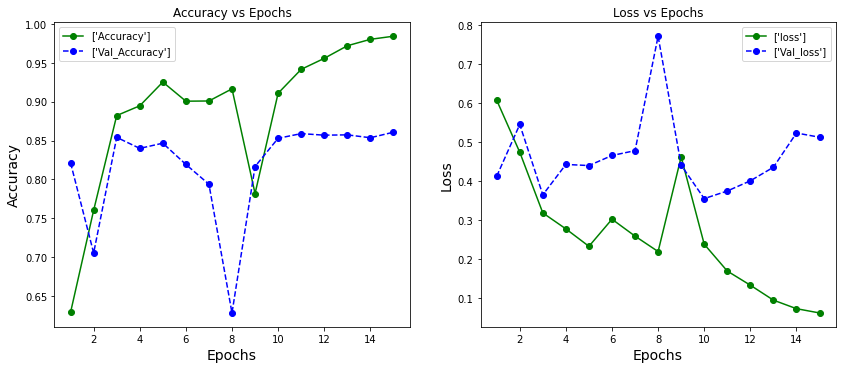

In [28]:
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(1, len(acc)+1)

plt.figure(figsize=(14,5.6))
plt.subplot(1,2,1)
plt.plot(epochs, acc, 'go-', label=['Accuracy'])
plt.plot(epochs, val_acc, 'bo--', label=['Val_Accuracy'])
plt.legend()
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)

plt.subplot(1,2,2)
plt.plot(epochs, loss, 'go-', label=['loss'])
plt.plot(epochs, val_loss, 'bo--', label=['Val_loss'])
plt.legend()
plt.title("Loss vs Epochs")
plt.xlabel("Epochs", fontsize=14)
plt.ylabel("Loss", fontsize=14)

plt.show()